In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [3]:
type_list = [#"Arts", 
             #"Automobiles", 
             #"Blogs", 
             #"Books", 
             "Business Day", 
             #"Education", 
             #"Fashion & Style", 
             #"Food", 
             #"Health", 
             #"Job Market", 
             #"Magazine", 
             #"membercenter", 
             #"Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now",  
             #"Open", 
             #"Opinion", 
             #"Public Editor", 
             #"Real Estate", 
             #"Science", 
             #"Sports", 
             #"Style", 
             "Sunday Review", 
             #"T Magazine", 
             #"Technology", 
             #"The Upshot", 
             #"Theater", 
             #"Times Insider", 
             "Today’s Paper", 
             #"Travel", 
             "U.S.", 
             "World", 
             #"Your Money"
]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['org_facet']
        for facet in text:
            facets.append(facet.lower())
            #print(facets)



In [4]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df['Number of Appearances'].value_counts()).head(20)
top_queries_reset = top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,islamic state in iraq and syria (isis),3
1,justice department,3
2,roman catholic church,2
3,presidential election of 2016,2
4,suits and litigation (civil),2
5,democratic party,2
6,immigration and emigration,2
7,espionage and intelligence services,2
8,education department (us),2
9,frauds and swindling,2


In [5]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"].head()
kw_list = ["isis"]
# Configure Google Trends

pytrends = TrendReq(hl='en-US', tz=360)
# Add the keyword list in 
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-07 2018-09-07', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,isis,lat,lng
0,Alabama,45,,
1,Alaska,59,,
2,Arizona,52,,
3,Arkansas,43,,
4,California,57,,
5,Colorado,76,,
6,Connecticut,55,,
7,Delaware,49,,
8,District of Columbia,100,,
9,Florida,54,,


In [6]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [7]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,isis,lat,lng
0,Alabama,45,32.318231,-86.902298
1,Alaska,59,64.200841,-149.493673
2,Arizona,52,34.048928,-111.093731
3,Arkansas,43,35.201050,-91.831833
4,California,57,36.778261,-119.417932


In [8]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['isis'].astype(float)

In [9]:
gmaps.configure(api_key = gkey)

In [10]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
pytrends.related_queries()

{'isis': {'top':                   query  value
  0             isis news    100
  1                 vegas     75
  2            isis vegas     75
  3          isis goddess     74
  4            trump isis     58
  5          what is isis     58
  6             las vegas     56
  7        isis las vegas     55
  8            isis video     49
  9              isis war     45
  10                syria     37
  11           isis syria     36
  12          isis attack     35
  13             isis map     33
  14            isis iraq     32
  15            isis flag     31
  16        egyptian isis     31
  17                 iraq     30
  18       isis terrorist     27
  19          isis videos     26
  20       vegas shooting     26
  21             isis god     25
  22         paddock isis     23
  23  vegas shooting isis     23
  24          isis leader     23,
  'rising':                                        query   value
  0                               paddock isis  118600
  1   

In [18]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['isis']['rising'].head(20)
related_query_df

,query,value
0,paddock isis,118600
1,vegas shooting isis,118200
2,stephen paddock,82250
3,vegas shooter,74600
4,stephen paddock isis,72350
5,vegas shooter isis,68150
6,las vegas shooter,46900
7,las vegas shooter isis,41700
8,isis claims vegas,33400
9,isis niger video,29900


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

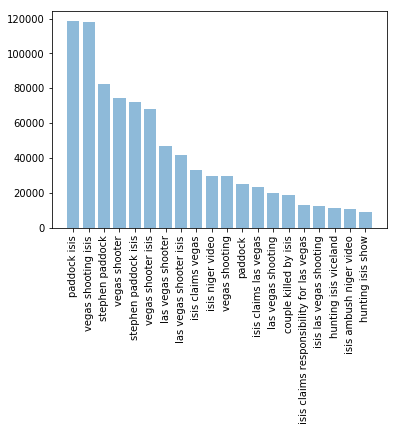

In [19]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

In [20]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head(52)

,isis,isPartial
date,,
2017-09-10,29,False
2017-09-17,28,False
2017-09-24,30,False
2017-10-01,100,False
2017-10-08,39,False
2017-10-15,44,False
2017-10-22,36,False
2017-10-29,52,False
2017-11-05,35,False


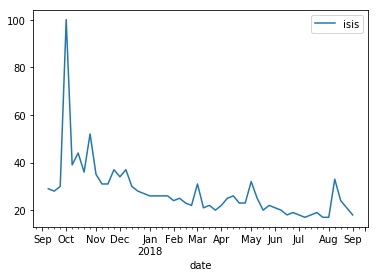

In [21]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()